**A dataset is given with following attributes such as Invoice Id, Branch,City,Customer type,Gender,Product Line,Unit Price,Quantity,Tax,Total Amount,Date Of Purchase, Time, Payment Method and rating. Find the relations between different parameters such as Product Lane vs Sales, Gender vs Sales, Time vs Sales and then use Machine Learning Algorithms to Predict sales based on Different Features**


**Attributes of the Dataset**

1)  Invoice id: Computer generated sales slip invoice identification number
2)  Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3)  City: Location of supercenters
4)  Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5)  Gender: Gender type of customer
6)  Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and     lifestyle, Sports and travel
7)  Unit price: Price of each product in $
8)  Quantity: Number of products purchased by customer
9)  Tax: Tax fee for customer buying
10) Total: Total price including tax
11) Date: Date of purchase (Record available from January 2019 to March 2019)
12) Time: Purchase time (10am to 9pm)
13) Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14) Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [1]:
#Importing All the Necessary Libraries Required for data analytics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
# Step 1: Load the Data
df = pd.read_csv('sales.csv', encoding= 'unicode_escape')

<h1 style="color:Blue; text-align:center;">Dataset Visualisation and Preprocessing</h1>

In [3]:
#To know the Size of the Table in terms of Rows and Coloumns 
df.shape

(1000, 14)

In [4]:
#Vizulaising 10 data from starting to know how data looks
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,105.0,627.0,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0,80.0,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,81.0,405.0,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,93.0,559.0,2019-01-27,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,181.0,785.0,2019-02-08,10:37,Ewallet,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,30.0,628.0,2019-03-25,18:30,Ewallet,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,21.0,434.0,2019-02-25,14:36,Ewallet,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,184.0,920.0,2019-02-24,11:38,Ewallet,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,15.0,87.0,2019-01-10,17:15,Credit card,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,25.0,189.0,2019-02-20,13:27,Credit card,5.9


In [5]:
# Step 2: Data Cleaning
print("Missing values:\n", df.isnull().sum())

Missing values:
 Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


In [6]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
# Slice 'Time' column to only include the hour part
df['Time'] = df['Time'].dt.hour

In [9]:
df.groupby('Branch')['City'].unique()

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

**Since Each Branch is associated with single City of Customers so we do not need City Coloumn and Invoice Id for Data Analysis so we will drop them from dataset**

In [10]:
df = df.drop(columns=['City','Invoice ID'], axis=1)

In [11]:
df.describe()

,Unit price,Quantity,Tax,Total,Time,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,53.738000,361.330000,14.910000,6.97270
std,26.494628,2.923431,53.257748,277.716196,3.186857,1.71858
min,10.080000,1.000000,1.000000,13.000000,10.000000,4.00000
25%,32.875000,3.000000,15.750000,137.750000,12.000000,5.50000
50%,55.230000,5.000000,36.000000,284.500000,15.000000,7.00000
75%,77.935000,8.000000,74.000000,535.250000,18.000000,8.50000
max,99.960000,10.000000,286.000000,1241.000000,20.000000,10.00000


<h1 style="color:red; text-align:center;">Exploratory Data Analysis</h1>


In [12]:
# Step 4: Data Aggregation
# Aggregate total sales by product line
total_sales_by_product_line = df.groupby('Product line')['Total'].sum().reset_index()
print("Total Sales by Product Line:\n", total_sales_by_product_line)

Total Sales by Product Line:
              Product line    Total
0  Electronic accessories  54338.0
1     Fashion accessories  56898.0
2      Food and beverages  61498.0
3       Health and beauty  56222.0
4      Home and lifestyle  64127.0
5       Sports and travel  68247.0


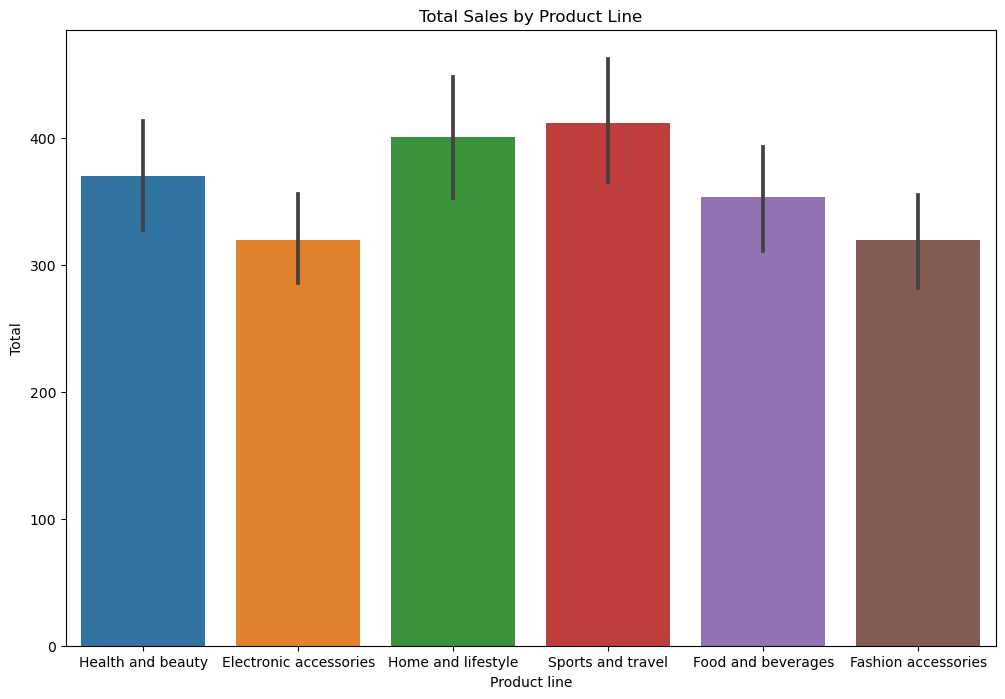

In [13]:
# Additional Visualization
# Visualize total sales by product line
plt.figure(figsize=(12, 8))
sns.barplot(x='Product line', y='Total', data=df)
plt.title('Total Sales by Product Line')
plt.show()

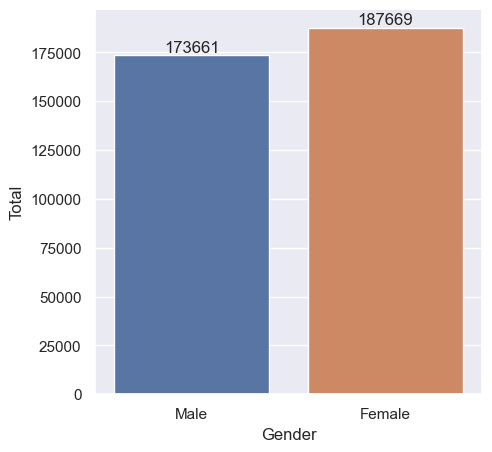

In [14]:
# plotting a bar chart for Gender VS its Purchase 
sales_total = df.groupby(['Gender'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=True)
sns.set(rc={'figure.figsize':(5,5)})
bx=sns.barplot(data = sales_total, x = 'Gender',y= 'Total')
for bars in bx.containers:
    bx.bar_label(bars)

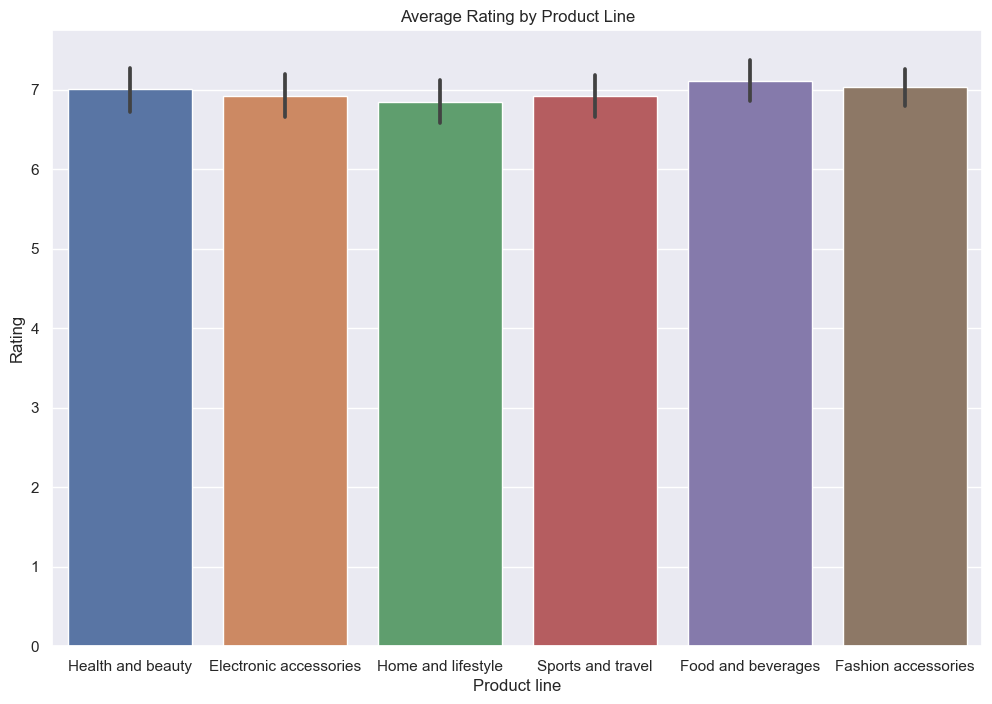

In [15]:
# Visualize average rating by product line
plt.figure(figsize=(12, 8))
sns.barplot(x='Product line', y='Rating', data=df)
plt.title('Average Rating by Product Line')
plt.show()

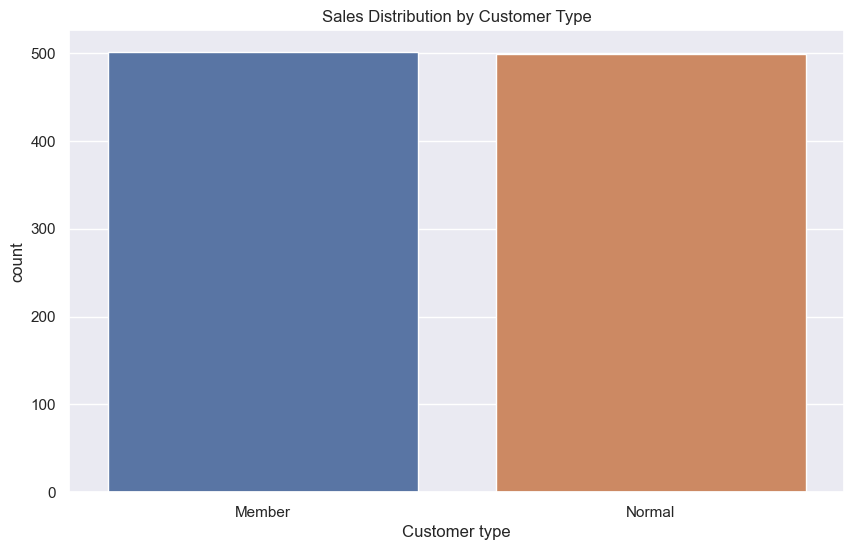

In [16]:
# Visualize sales distribution by customer type
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer type', data=df)
plt.title('Sales Distribution by Customer Type')
plt.show()

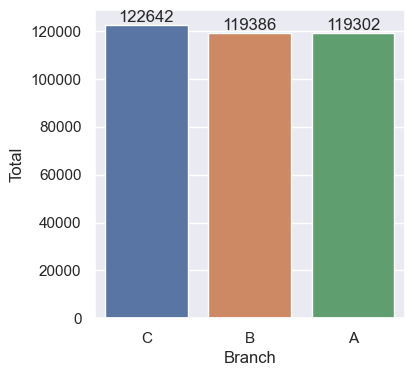

In [17]:
#Graph of Total sales in each Branch 
sales_total = df.groupby(['Branch'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.set(rc={'figure.figsize':(4,4)})
bx=sns.barplot(data = sales_total, x = 'Branch',y= 'Total')
for bars in bx.containers:
    bx.bar_label(bars)

In [18]:
#Counting Number of Customers From each branch
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

<Axes: ylabel='Branch'>

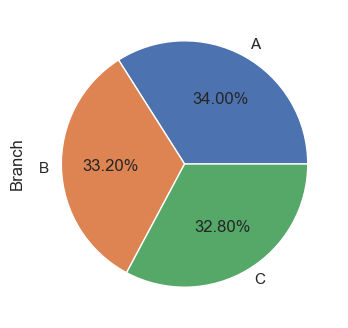

In [19]:
#Ploting a Pie Chart to show distribution of Customers in each Branch
df['Branch'].value_counts().plot(kind='pie',autopct="%0.2f%%")

**We can conclude that Maximum number of Customers Visit the Branch A then Branch B and then Branch C**

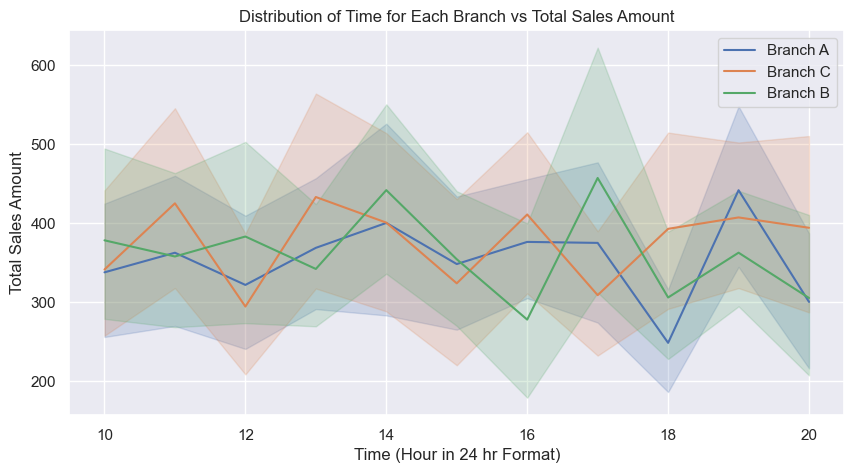

In [20]:
branches = df['Branch'].unique()

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 5))

# Loop through each branch and plot a line chart
for branch in branches:
    branch_data = df[df['Branch'] == branch]
    sns.lineplot(data=branch_data, x='Time', y='Total', label=f'Branch {branch}')

# Set the title and labels
plt.title('Distribution of Time for Each Branch vs Total Sales Amount')
plt.xlabel('Time (Hour in 24 hr Format)')
plt.ylabel('Total Sales Amount')

# Add a legend
plt.legend()

# Show the plot
plt.show()

From this Graph we can conclude the following based on sales amount:-
1) Peak Time for Branch A is 7:00 Pm and least at 6:00 Pm 
2) Peak Time for Branch B is 5:00 Pm and least at 4:00 Pm
3) Peak Time for Branch C is 11:00 Am and least at 12:00 Pm

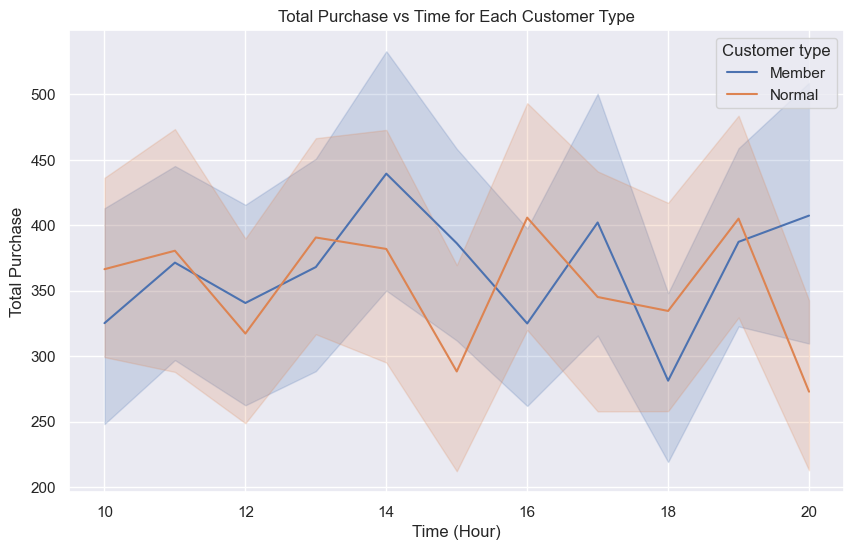

In [21]:
# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot a line chart for each customer type
sns.lineplot(data=df, x='Time', y='Total', hue='Customer type')

# Set the title and labels
plt.title('Total Purchase vs Time for Each Customer Type')
plt.xlabel('Time (Hour)')
plt.ylabel('Total Purchase')

# Show the plot
plt.show()

**We Can Conclude that Members of the Supermarket have total purchased more compared to normal customers & Peak Hours for Member customers are 1:00 Pm to 2:00 Pm and for Normal Customer Peak Hours is 3:00 - 4:00 Pm & 6:00 - 7:00 Pm**

In [22]:
#Converting Categorical Data to Numerical Data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Customer type'] = label_encoder.fit_transform(df['Customer type'])
df['Product line'] = label_encoder.fit_transform(df['Product line'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Payment'] = label_encoder.fit_transform(df['Payment'])
df['Branch'] = label_encoder.fit_transform(df['Branch'])
df.head(10)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,0,0,0,3,74.69,7,105.0,627.0,2019-01-05,13,2,9.1
1,2,1,0,0,15.28,5,4.0,80.0,2019-03-08,10,0,9.6
2,0,1,1,4,46.33,7,81.0,405.0,2019-03-03,13,1,7.4
3,0,0,1,3,58.22,8,93.0,559.0,2019-01-27,20,2,8.4
4,0,1,1,5,86.31,7,181.0,785.0,2019-02-08,10,2,5.3
5,2,1,1,0,85.39,7,30.0,628.0,2019-03-25,18,2,4.1
6,0,0,0,0,68.84,6,21.0,434.0,2019-02-25,14,2,5.8
7,2,1,0,4,73.56,10,184.0,920.0,2019-02-24,11,2,8.0
8,0,0,0,3,36.26,2,15.0,87.0,2019-01-10,17,1,7.2
9,1,0,0,2,54.84,3,25.0,189.0,2019-02-20,13,1,5.9


<h1 style="color:red; text-align:center;">Machine Learning Algorithms to Predict sales based upon different Features</h1>

In [23]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Total'].sort_values(ascending=False)

Total            1.000000
Tax              0.849545
Quantity         0.698707
Unit price       0.630266
Product line     0.126748
Branch           0.033838
Time            -0.006373
Payment         -0.010782
Customer type   -0.022982
Rating          -0.038242
Gender          -0.047862
Name: Total, dtype: float64

**Since Total have significant corelation with Tax, Quantity, Unit Price,Product Line hence we will choose these 4 parameters to predictthe sales**

<h1 style="color:green; text-align:center;">Linear Regression</h1>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming df is your DataFrame
X = df[['Unit price','Quantity','Tax','Product line']]
y = df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation mean score:", scores.mean())

Mean Absolute Error: 44.33831588462419
R^2 Score: 0.9527632972367481
Cross-validation mean score: 0.9445800144020182


<h1 style="color:green; text-align:center;">Decision Tree</h1>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming df is your DataFrame and it's already loaded
X = df[['Unit price', 'Quantity', 'Tax', 'Product line']]
y = df['Total']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor object
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

# Now you can use this model to predict sales
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5)
print("Cross-validation mean score:", scores.mean())

Mean Absolute Error: 9.48
R^2 Score: 0.9959061799306279
Cross-validation mean score: 0.9934560616977001


<h1 style="color:green; text-align:center;">Gradient Boosting Regression</h1>

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame and it's already loaded
X = df[['Unit price', 'Quantity', 'Tax', 'Product line']]
y = df['Total']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a gradient boosting regressor object
regressor = GradientBoostingRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

# Now you can use this model to predict sales
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5)
print("Cross-validation mean score:", scores.mean())

Mean Absolute Error: 15.310035748284355
R^2 Score: 0.9936207744287204
Cross-validation mean score: 0.9942344898566745


In [27]:
data = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Gradient Booster'],
    'Mean Absolute Error': [44.33831588462419, 9.48, 15.310035748284355],
    'R^2 Score': [0.9527632972367481, 0.9959061799306279, 0.9936207744287204],
    'Cross Validation Mean Score': [0.9445800144020182, 0.9934560616977001, 0.9942344898566745]
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Algorithm,Mean Absolute Error,R^2 Score,Cross Validation Mean Score
0,Linear Regression,44.338316,0.952763,0.944580
1,Decision Tree,9.480000,0.995906,0.993456
2,Gradient Booster,15.310036,0.993621,0.994234


**The Decision Tree model has the lowest Mean Absolute Error (MAE) and the highest R² Score and Cross-Validation Mean Score. This suggests that the Decision Tree model has the best performance among the three models on to Predict sales based on Unit price,Quantity,Tax,Product line parameters.**